# Вводная часть:
В нашем проекте будет 2 части. В Части 1. Приоритизация гипотез, у нас будет 9 гипотез, по которым найдем ICE и RICE и посмотрим на разницу и узнаем почему гипотезы с мах ICE может быть не мах RICE. Во 2 Части проекта Анализ A/B-теста. Проанализируем A/B-тест сделаем графики: кумулятивной выручки по группам, кумулятивного среднего чека по группам, относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивного среднего количества заказов на посетителя по группам, относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, точечный график количества заказов по пользователям, точечный график стоимостей заказов. Посчитаем 95 и 99 процентиль количества заказов на пользователя и стоимости заказов. Также посчитаем: статистическую значимость различий в среднем количестве заказов на посетителя между группами по "сырым" и по "очищенным" данным;  статистическую значимость различий в среднем чеке заказа между группами по "сырым" и по "очищенным" данным. И на основании полученных данных примем решение о результатах теста (есть различие между группами, нет различий между группами или надо продолжить тест)

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

#   Часть 1. Приоритизация гипотез.

In [2]:
#загразку данных можно через try-except
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [3]:
#колонки к нижнему регистру
hypothesis.columns=hypothesis.columns.str.lower()

Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

## Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
hypothesis['ice']=hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis


,hypothesis,reach,impact,confidence,efforts,ice
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000


In [5]:
hypothesis.loc[hypothesis['reach']==5,'ice']=5
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,5.000000
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000


## Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
hypothesis['rice']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

In [7]:
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,5.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Вывод: 

приоритизация гипотез изменилась при применении RICE вместо ICE. Почему так произошло? Разница между ICE и RICE  в столбце reach этот столбец отвечает за охват пользователей, т.е. количество пользователей, которых затронет изменения. Если посмотреть на ICE максимальный, он 16,2, но reach у него всего 1 т.е. количество пользователей он затронет минимум. Так же как и у ICE = 13,3(второй по величине) у него reach = 3, а у ICE = 11,2(третий по величине), у него reach максимальный, равный 10. поэтому RICE у него самый высокий равный 112

# Часть 2. Анализ A/B-теста

## Открыть файл с данными и изучите общую информацию

In [8]:
#загразку данных можно через try-except
#pd.read_csv('/datasets/orders.csv', sep=',', parse_dates=['date'])
orders = pd.read_csv('/datasets/orders.csv', sep=',')


In [9]:
#меняем название колонок, для удобства. Меняем тип данных
orders=orders.rename(columns={'transactionId':'orderId', 'visitorId':'userId'})
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
userA=orders[orders ['group']=='A']
userA['userId'].nunique()

503

In [11]:
userB=orders[orders ['group']=='B']
userB['userId'].nunique()

586

In [12]:
userA['repit']=userA['userId'].isin(userB['userId'])

In [13]:
orders_repit=userA[userA['repit']==True]
orders_repit['userId'].nunique()

58

In [14]:
orders_repit['userId'].nunique()/orders['userId'].nunique()*100

5.625606207565471

мы нашли пользователей, которые повторяются в обеих группах 58 человек, это 5.6% от общих данных. если оставить их, то они могут исказить данные, потому что мы не знаем какой именно вариант привел их к покупке

In [15]:
orders['repit']=orders['userId'].isin(orders_repit['userId'])
orders=orders[orders['repit']==False]

In [16]:
#загразку данных можно через try-except
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [17]:
#Меняем тип данных
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


посмотрим есть ли дубликаты и пропуски

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orderId  1016 non-null   int64         
 1   userId   1016 non-null   int64         
 2   date     1016 non-null   datetime64[ns]
 3   revenue  1016 non-null   int64         
 4   group    1016 non-null   object        
 5   repit    1016 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(1)
memory usage: 48.6+ KB


In [19]:
orders.duplicated().sum()

0

In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [21]:
visitors.duplicated().sum()

0

### Вывод: у нас 2 группы теста. Длительность теста 31 день(даты: с 2019-08-01 до 2019-08-31). До удаления пользователей находившихся в обеих группах. пользователей в группе А 503, в группе В 586. после удаления в группе А 445, в группе В 528. Из каждой группы убрали по 58 пользователей. разница в группах не значительная, возможна более эффективная работа с пользователями в группе В. Дубликатов и пропусков в данных нет

## Cобрать кумулятивные данные

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 

date — дата;

group — группа A/B-теста (A или B);

orders — кумулятивное количество заказов на указанную дату в указанной группе;

buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;

revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);

visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5) 


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


 даты: с 2019-08-01 до 2019-08-31

## Построем график кумулятивной выручки по группам. Сделаем выводы и предположения.

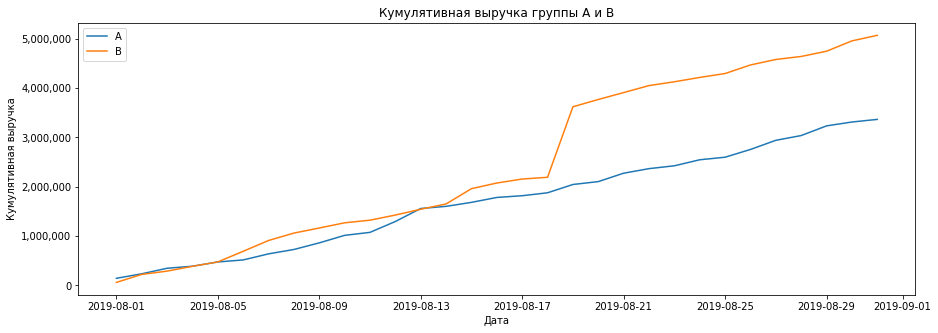

In [23]:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
fig=plt.subplots(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
#plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Кумулятивная выручка группы А и В')
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.legend()

plt.show()

### Вывод: Выручка почти равномерно увеличивается в течение всего теста. выручка в группе В немного выше, чем в группе А. также видно резкий скачек в группе В это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

## Построем график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

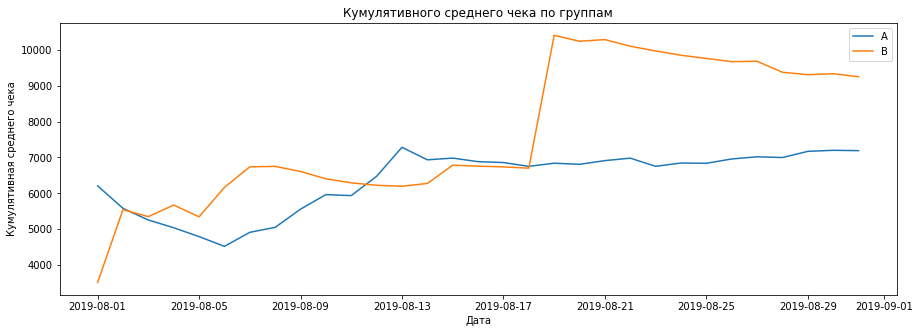

In [24]:
# разделим выручку на количество заказов по каждой группе
fig=plt.subplots(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивного среднего чека по группам')
plt.ylabel('Кумулятивная среднего чека')
plt.xlabel('Дата')
plt.legend()
plt.show()

### Вывод: Средний чек варьируется в обеих группах, видно резкий скачек в группе В. средний чек в группе В до резкого скачка был, то выше, то ниже, группы А

## Построем график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

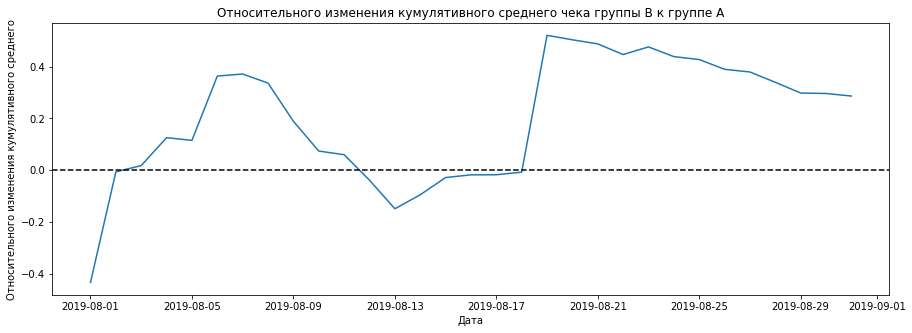

In [25]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig=plt.subplots(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Относительного изменения кумулятивного среднего')
plt.xlabel('Дата')
plt.show()

### Вывод: в нескольких точках график различия между сегментами резко «скачет». Где-то есть крупные заказы и выбросы

## Построем график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

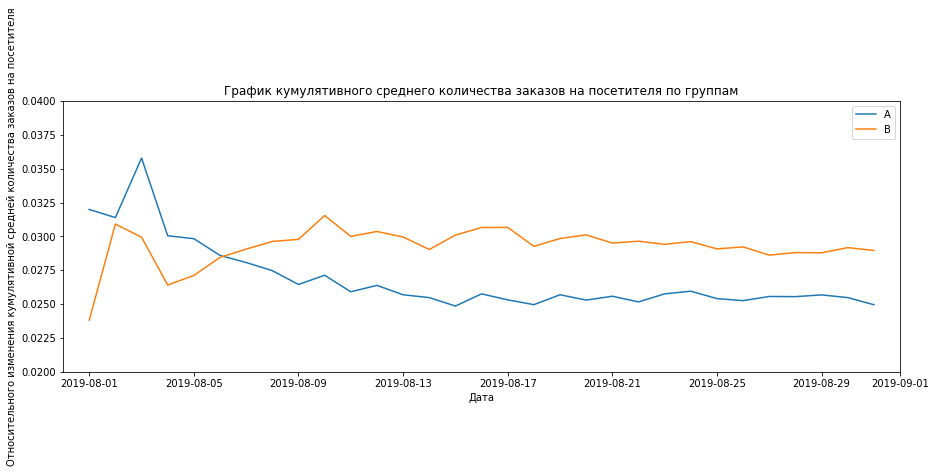

In [26]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
fig=plt.subplots(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей

plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0.020, 0.04]) 
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Относительного изменения кумулятивной средней количества заказов на посетителя')
plt.xlabel('Дата')
plt.show()

### Вывод: Симметричный график получился. Относительного изменения кумулятивной средней количества заказов на посетителя группы В находится чуть выше группы А. Зафиксировалась примерно в одном положениее

## Построем график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

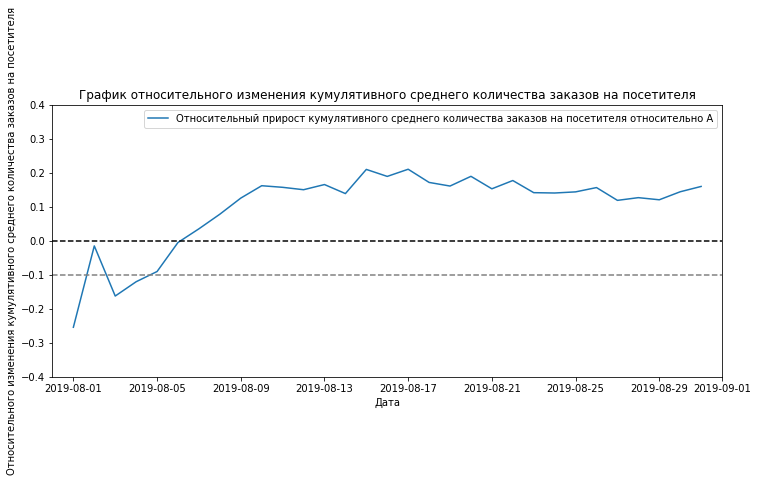

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig=plt.subplots(figsize=(12,5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя относительно А")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), -0.4, 0.4])
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.ylabel('Относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')

plt.legend();

### Вывод: В начале теста группа B немного проигрывала группе A, затем вырвалась вперёд. Потом В снова немного упала, но теперь постепенно растёт.

In [28]:
df=orders.copy()
df.head(5)

,orderId,userId,date,revenue,group,repit
0,3667963787,3312258926,2019-08-15,1650,B,False
1,2804400009,3642806036,2019-08-15,730,B,False
3,3797467345,1196621759,2019-08-15,9759,B,False
4,2282983706,2322279887,2019-08-15,2308,B,False
5,182168103,935554773,2019-08-15,2210,B,False


## Построем точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [29]:

ordersByUsers = df.groupby('userId', as_index=False).agg({'orderId': 'nunique'})

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(5)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


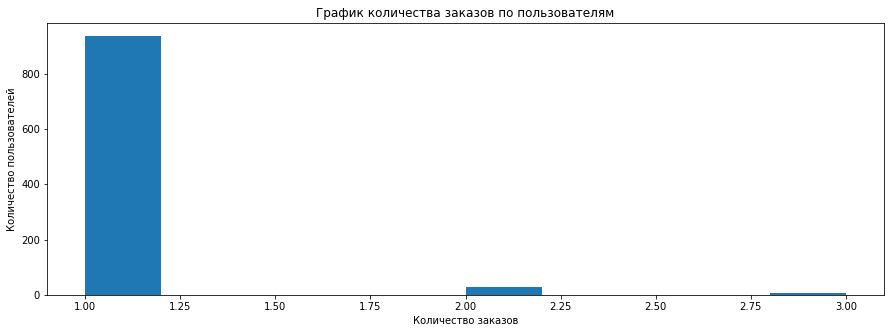

In [30]:
fig=plt.subplots( figsize=(15,5))
plt.hist(ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов');

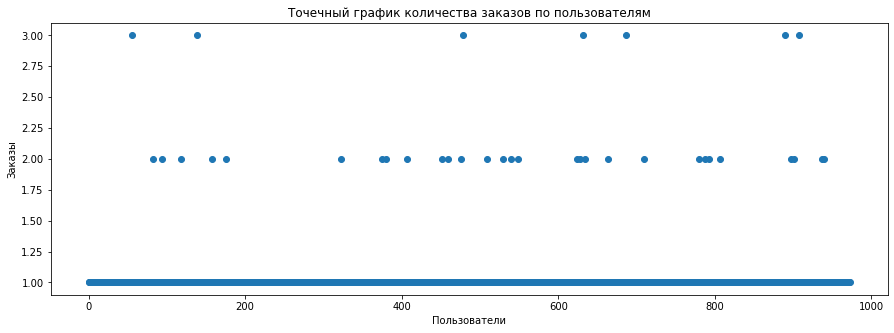

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))
fig=plt.subplots( figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Заказы')
plt.xlabel('Пользователи');


### Вывод: большинство пользователей делают не больше 2 заказов. 

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [32]:
np.percentile(ordersByUsers['orders'], [ 95, 99])

array([1., 2.])

### Вывод: возьмем границу для определения аномальных пользователей - больше 2-х заказов

## Построем точечный график стоимостей заказов. Сделаем выводы и предположения.

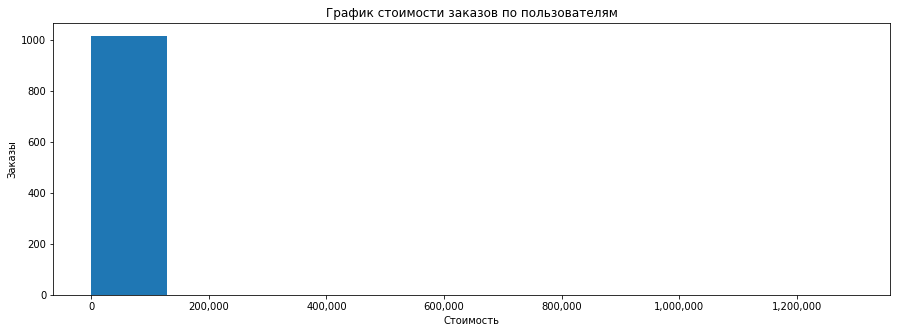

In [33]:
fig=plt.subplots( figsize=(15,5))
plt.hist(df['revenue'])
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('График стоимости заказов по пользователям')
plt.ylabel('Заказы')
plt.xlabel('Стоимость');

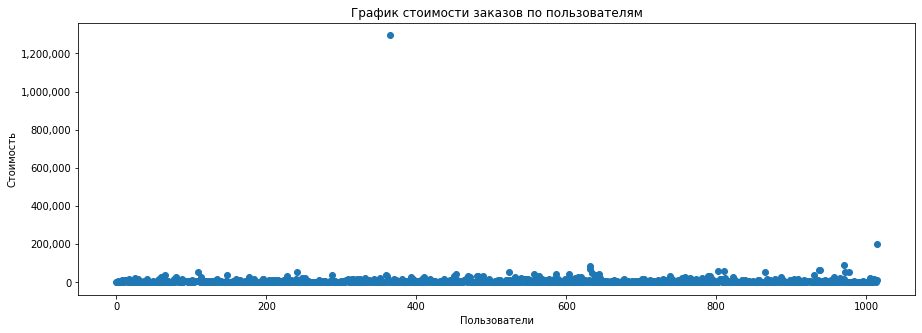

In [34]:
x_values = pd.Series(range(0,len(df['revenue'])))
fig=plt.subplots( figsize=(15,5))
plt.scatter(x_values, df['revenue'])
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('График стоимости заказов по пользователям')
plt.ylabel('Стоимость')
plt.xlabel('Пользователи');

сделаем точечный график еще раз, но уже без двух точек аномалий, зададим масштаб осей

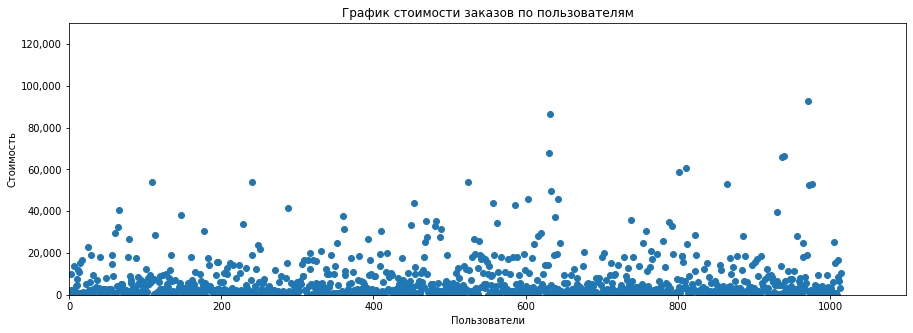

In [35]:
x_values = pd.Series(range(0,len(df['revenue'])))
fig=plt.subplots( figsize=(15,5))
plt.scatter(x_values, df['revenue'])
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.axis([0, 1100, 0, 130000])
plt.title('График стоимости заказов по пользователям')
plt.ylabel('Стоимость')
plt.xlabel('Пользователи');

### Вывод: после масштаба осей видно, что почти все заказы до 60000. Но есть и аномалии, который около 200000 и 1200000

## Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [36]:
np.percentile(df['revenue'], [95, 99])

array([26785., 53904.])

### Вывод: возьмем между 95 и 99 процентилем до 30000

### Сформулируем гипотезы. Нулевая(Но): различий в среднем количестве заказов между группами нет. Альтернативная(Н1)  различия в среднем между группами есть.

В случае, когда в данных есть большие (по сравнению с нормальным распределением) выбросы, алгебраические метрики работают плохо, поэтому будем использовать непараметрический тест Уилкоксона-Манна-Уитни

Начнём с подготовки данных

убрал массивный код из "аназила теста а/в шаг за шагом

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [37]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsersB.columns = ['userId', 'orders']


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

In [38]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [39]:

print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]),' p-value')

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1), 'относительная разница средних количества заказов на посетителя')


0.011  p-value
0.160 относительная разница средних количества заказов на посетителя


### Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть. Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, принять не можем. Относительный проигрыш группы А равен 16% — второе число в выводе.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

In [40]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]), 'p-value')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1), 'относительная разница в среднем чеке')

0.829 p-value
0.287 относительная разница в среднем чеке


In [41]:
stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

0.8294908998149533

### Вывод: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A на 28,7%

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём от 1 до  5% пользователей с дорогими заказами и  1%  пользователей с наибольшим числом заказов. 

In [42]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
Name: userId, dtype: int64
49


Всего 49 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

найдем % потерь аномальных пользователей от общего количества

In [43]:
abnormalUsers.nunique()/orders['userId'].nunique()*100

5.0359712230215825

5% пользователей с аномальными значениями

In [44]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)




## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [45]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]), 'p-value')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1), 'относительная разница средних количества заказов на посетителя')

0.010 p-value
0.187 относительная разница средних количества заказов на посетителя


### Вывод: Результаты по среднему количеству заказов практически не изменились значит Но принять не можем. Группа А так же проигрывает группе В, только теперь 16.2%

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

In [46]:
print('p-value '
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительная разница в среднем чеке '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
     )
)

p-value 0.741
относительная разница в среднем чеке -0.027


### Вывод: P-value уменьшился, но и разница между сегментами сократилась и изменилась с 28,7% до -2,7% (т.е. средний чек в группа В меньше группы А).


## Вывод: На основании статистических тестов по части средней количества заказов на посетителей группа В лучше группы А (отношение В/А = 16%), что по сырым данным, что по очищенным, который более менее стабилизировался. Что не скажешь про средний чек и судя по графику, к этому нет предпосылок, но согласно закона больших чисел рано или поздно он стабилизируется, но ждать его стабилизации приведет к большим затратам для бизнеса. На основании проведенного исследования предлагаю принять решение о остановке А/В теста и зафиксировать победу одной из групп - это группа В